In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import accuracy_score
import timeit
from sklearn.metrics import classification_report

# Data Import

In [2]:
digits_train = pd.read_csv('./train.csv')
digits_test = pd.read_csv('./test.csv')

In [3]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(digits_train.shape)

(42000, 785)


In [5]:
digits_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
digits_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


    - There are 42000 data points with 785 columns. Its a 28 by 28 image therefore there are 784 pixels and each column represents the brightness of the ink in the pixel

## Check for null values

In [7]:
# No Null values
print(digits_train.isnull().sum().sum())

0


There are no null values present

## check the distribution of labels in the data

In [8]:
print(sorted(digits_train.label.unique().tolist()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


There are digits from 0 to 9 present in the data.

In [9]:
print(digits_train.label.value_counts().sort_index())
print('\nIn percentage of total:\n')
print(round(100*digits_train.label.value_counts().sort_index()/len(digits_train),2))

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In percentage of total:

0     9.84
1    11.15
2     9.95
3    10.36
4     9.70
5     9.04
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64


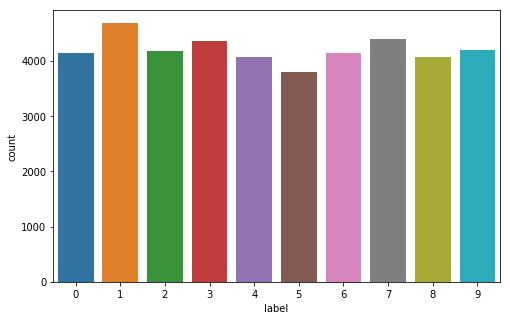

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(digits_train.label)
plt.show()

We can see that the distribution of the labels is more or less even

## Correlation between pixels and digits

In [11]:
plot_freq = pd.value_counts(digits_train.values.ravel()).sort_index().reset_index()

In [12]:
plot_freq.head()

,index,0
0,0,26625444
1,1,20854
2,2,27778
3,3,29547
4,4,30805


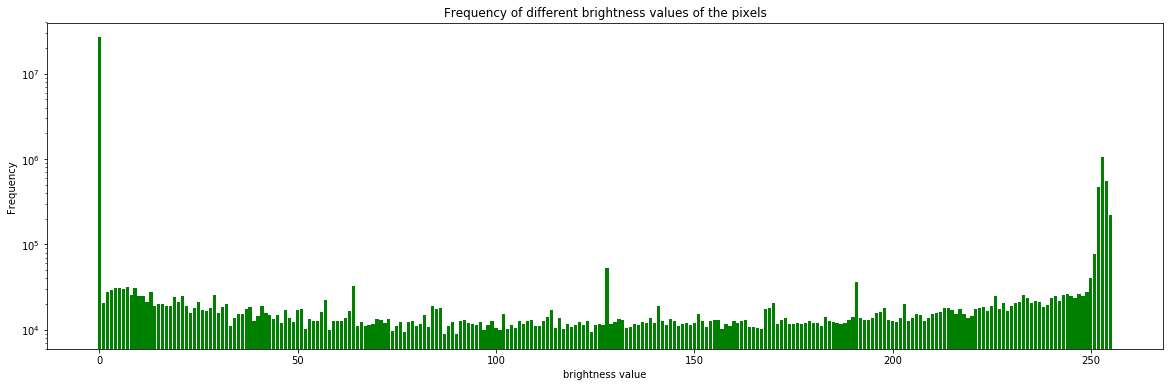

In [13]:
plt.figure(figsize = (20,6))
plt.bar(plot_freq['index'], plot_freq[0], color="g")
plt.title('Frequency of different brightness values of the pixels')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('brightness value')
plt.show()

from the above plot we can see that majority of the values are zero followed by very high pixel values

In [14]:
df_desc = digits_train.describe().T

In [15]:
df_desc[df_desc['max'] == 0].shape

(76, 8)

There are 76 pixels which are always zero for all the variables

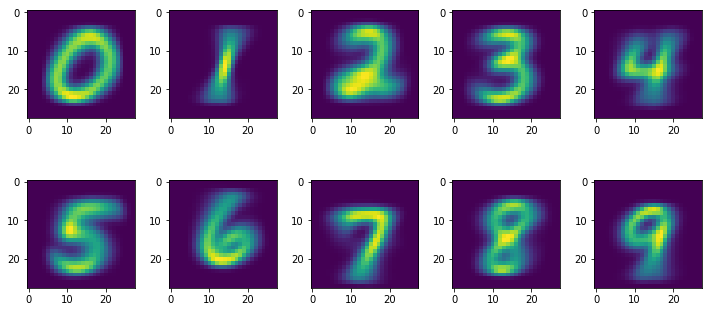

CPU times: user 18 s, sys: 218 ms, total: 18.2 s
Wall time: 18.3 s


In [16]:
%%time
label_list = sorted(digits_train.label.unique().tolist())
i = 1
plt.figure(figsize = (10,5))
for label in label_list:
    plt.subplot(2,5,i)
    plt.imshow(digits_train[digits_train.label == label].describe().T.drop('label')['mean'].values.reshape(28,28))
    i = i+1
plt.tight_layout()
plt.show()

We can see that outer pixels are never lit up in almost all the cases. We can see that there is similairty of pixel values for digits like 4 and 9, 3 and 8.

## Correlation matrix

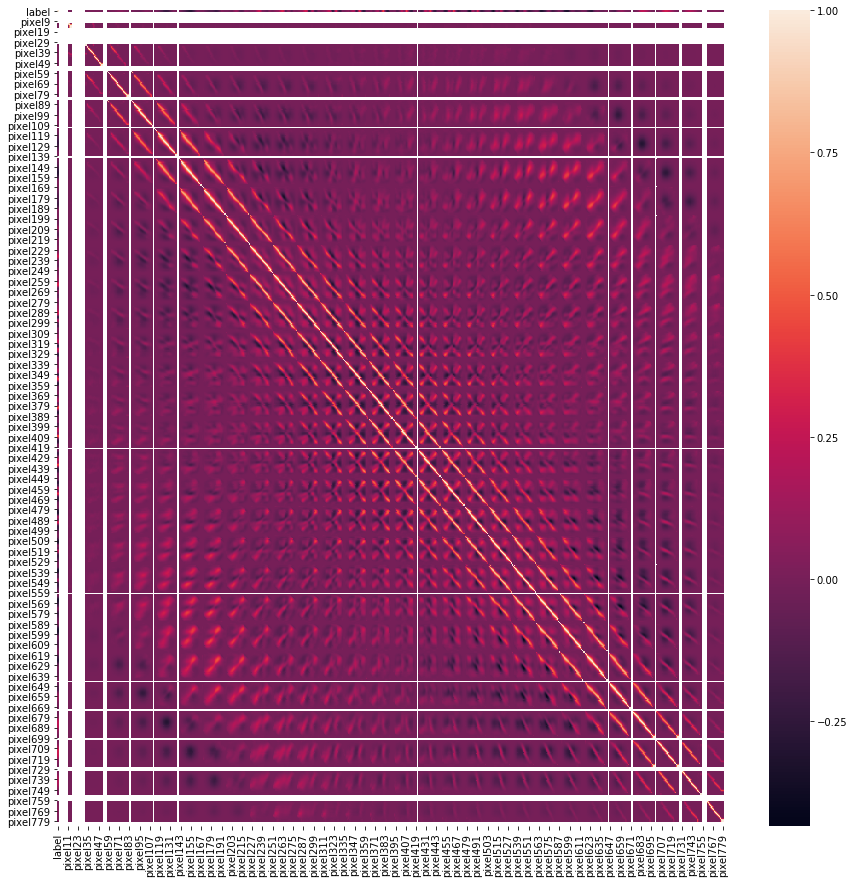

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(digits_train.corr())
plt.show()

We can see that there is a fairly high correlation between the adjacent pictures,which seems intuitive.

# Scaling and train-test set

In [18]:
X = digits_train.drop('label',axis = 1)
y = digits_train.label

### Scaling

Making all values between 0 and 1. Since the maximum value of brigthness is 255 and minimum is 0. Therefore dividing the values by 255.

In [19]:
X = X/255

In [20]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.1,test_size = 0.9,random_state = 28,stratify = y)

In [23]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(42000,)
(4200,)
(37800,)


In [24]:
print('Actual dataset:')
print(round(100*y.value_counts().sort_index()/len(y),2))
print('train dataset:')
print(round(100*y_train.value_counts().sort_index()/len(y_train),2))
print('test dataset:')
print(round(100*y_test.value_counts().sort_index()/len(y_test),2))

Actual dataset:
0     9.84
1    11.15
2     9.95
3    10.36
4     9.70
5     9.04
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64
train dataset:
0     9.83
1    11.14
2     9.95
3    10.36
4     9.69
5     9.05
6     9.86
7    10.48
8     9.67
9     9.98
Name: label, dtype: float64
test dataset:
0     9.84
1    11.15
2     9.94
3    10.36
4     9.70
5     9.03
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64


# Model

## Linear Model

In [25]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)
hyper_params = [ {'C': [0.1,1, 10, 100]}]
linear_model = SVC(kernel="linear")
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_train, y_train) 
elapsed = timeit.default_timer()-start_time


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


In [26]:
print(elapsed)

71.024374355


In [27]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.538063,0.166459,1.456788,0.035327,0.1,{'C': 0.1},0.919048,0.921429,0.935714,0.920238,...,0.922857,0.006538,1,0.988988,0.988393,0.984226,0.989583,0.987798,0.987798,0.001882
1,4.213340,0.126454,1.489657,0.027926,1,{'C': 1},0.908333,0.914286,0.929762,0.911905,...,0.915952,0.007323,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,5.930903,1.349791,1.746600,0.183932,10,{'C': 10},0.908333,0.914286,0.929762,0.911905,...,0.915952,0.007323,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,5.454965,0.892178,1.555098,0.182861,100,{'C': 100},0.908333,0.914286,0.929762,0.911905,...,0.915952,0.007323,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


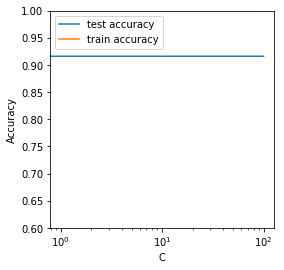

In [28]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(4,4))

plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()


In [29]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9228571428571428 corresponding to hyperparameters {'C': 0.1}


In [30]:
linear_model = SVC(kernel="linear",C = 0.1)

In [31]:
linear_model.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
y_pred = linear_model.predict(X_train)

In [33]:
cm = confusion_matrix(y_train,y_pred)

In [34]:
cm

array([[413,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 467,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0, 412,   2,   2,   0,   2,   0,   0,   0],
       [  0,   1,   1, 425,   0,   3,   1,   1,   2,   1],
       [  0,   0,   0,   0, 404,   0,   0,   0,   0,   3],
       [  0,   2,   0,   3,   1, 372,   1,   0,   1,   0],
       [  0,   0,   1,   0,   0,   1, 412,   0,   0,   0],
       [  0,   1,   1,   2,   1,   0,   1, 429,   0,   5],
       [  0,   1,   0,   3,   0,   4,   0,   0, 398,   0],
       [  0,   1,   0,   2,   4,   1,   0,   3,   1, 407]])

In [35]:
accuracy_score(y_train,y_pred)

0.9854761904761905

In [36]:
y_test_pred = linear_model.predict(X_test)

In [37]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[3601,    0,   17,    8,    8,   29,   23,    0,   26,    7],
       [   0, 4144,   12,    9,    3,    7,    7,   10,   16,    8],
       [  39,   54, 3359,   38,   55,   19,   41,   66,   71,   17],
       [  12,   44,   88, 3433,    8,  180,   10,   41,   76,   24],
       [   9,   13,   22,    3, 3431,    7,   23,   11,    6,  140],
       [  44,   30,   24,  128,   41, 2964,   51,    4,  107,   22],
       [  37,    6,   45,    7,   43,   55, 3520,    0,   10,    0],
       [  21,   35,   55,   19,   46,   13,    2, 3644,    6,  120],
       [  18,   86,   50,  124,   35,  115,   26,   16, 3143,   44],
       [  21,   16,   17,   46,  148,   33,    1,  143,   43, 3301]])

In [38]:
accuracy_score(y_test,y_test_pred)

0.9137566137566138

The accuracy of the test set if 0.913 which is a significant drop from 0.985 for the train set. There seems to be significant amount of overfitting with the linear model

## Polynomial model

In [39]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)
hyper_params = [ {'C': [10, 100,1000,10000]}]
poly_model = SVC(kernel="poly")
model_cv = GridSearchCV(estimator = poly_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_train, y_train)                  
elapsed = timeit.default_timer()-start_time

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


In [40]:
print(elapsed)

141.90610611099999


In [41]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.778669,0.169814,3.659823,0.054333,10,{'C': 10},0.383333,0.396429,0.395238,0.386905,...,0.388810,0.005957,4,0.406548,0.408333,0.404762,0.405060,0.389286,0.402798,0.006874
1,16.616287,0.909270,2.695633,0.038970,100,{'C': 100},0.847619,0.822619,0.841667,0.841667,...,0.836667,0.009110,3,0.858631,0.866964,0.865179,0.861607,0.858333,0.862143,0.003452
2,8.231904,0.226710,2.129144,0.347889,1000,{'C': 1000},0.925000,0.928571,0.939286,0.925000,...,0.927619,0.006406,2,0.978571,0.981548,0.979167,0.982440,0.978869,0.980119,0.001568
3,5.382231,0.515605,1.212658,0.148023,10000,{'C': 10000},0.944048,0.944048,0.954762,0.939286,...,0.944048,0.005881,1,1.000000,0.999702,1.000000,0.999405,0.999405,0.999702,0.000266


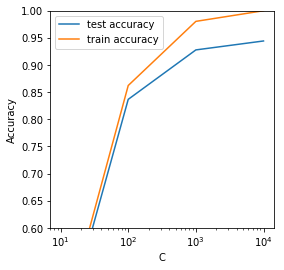

In [42]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(4,4))

plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [43]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.944047619047619 corresponding to hyperparameters {'C': 10000}


From the above figure we can see that as C increases the overfitting of the model also increases. Though accuracy of the model is lower at c = 1000 than with 1e4, we are selection c as 1e3 to avoid overfitting

In [44]:
poly_model = SVC(kernel="poly",C = 1e3)
start_time = timeit.default_timer()
poly_model.fit(X_train,y_train)
elapsed = timeit.default_timer()-start_time
print(elapsed)

6.9419307129999765


In [45]:
y_pred = poly_model.predict(X_train)

cm = confusion_matrix(y_train,y_pred)

cm


array([[407,   1,   0,   0,   1,   3,   0,   0,   0,   1],
       [  0, 467,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   8, 406,   0,   2,   0,   0,   2,   0,   0],
       [  0,   6,   0, 424,   0,   3,   0,   1,   0,   1],
       [  0,   3,   0,   0, 403,   0,   0,   0,   0,   1],
       [  0,   3,   0,   0,   0, 377,   0,   0,   0,   0],
       [  0,   5,   0,   0,   1,   0, 408,   0,   0,   0],
       [  0,   9,   0,   0,   0,   0,   0, 431,   0,   0],
       [  0,   6,   0,   0,   1,   2,   0,   0, 397,   0],
       [  0,   6,   0,   2,   3,   2,   0,   1,   0, 405]])

In [46]:
accuracy_score(y_train,y_pred)

0.9821428571428571

In [47]:
y_test_pred = poly_model.predict(X_test)

cm = confusion_matrix(y_test,y_test_pred)
cm

array([[3531,   18,    5,    5,    7,   89,   32,    2,   24,    6],
       [   0, 4169,    8,    6,    5,    2,    6,    5,   13,    2],
       [  30,  161, 3316,   22,   72,   22,   10,   69,   48,    9],
       [  14,  107,   42, 3473,    8,  150,    5,   40,   62,   15],
       [   4,   53,   14,    0, 3484,    1,   11,    8,   10,   80],
       [  31,   70,    2,   64,   10, 3126,   46,    2,   50,   14],
       [  23,   75,    6,    2,   33,   35, 3539,    0,   10,    0],
       [   8,  142,   35,    3,   27,   13,    1, 3654,   11,   67],
       [   9,  100,   21,   75,   42,   80,   19,   16, 3261,   34],
       [  28,   64,    7,   52,  116,   19,    0,   72,   40, 3371]])

In [48]:
accuracy_score(y_test,y_test_pred)

0.9239153439153439

The accuracy of the test set if 0.923 which is a significant drop from 0.982 for the train set. The poly model seems to perform slightly better than the linear model

## Radial model

In [49]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)


hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3],
                     'C': [0.1,1, 10, 100, 1000]}]

rbf_model = SVC(kernel="rbf")
model_cv = GridSearchCV(estimator = rbf_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_train, y_train)                  
elapsed = timeit.default_timer()-start_time
print(elapsed)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  9.9min finished


599.2386904309999


In [50]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,32.674224,0.715703,3.862259,0.022566,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.195238,0.197619,0.195238,...,0.192381,0.005461,15,0.201786,0.197321,0.198214,0.203274,0.205060,0.201131,0.002949
1,16.781727,0.353276,3.395605,0.106972,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.897619,0.903571,0.919048,...,0.903571,0.012644,8,0.921131,0.920536,0.914583,0.917560,0.921726,0.919107,0.002678
2,28.614680,0.255485,3.995546,0.092906,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.666667,0.653571,0.697619,...,0.666429,0.017027,14,0.672024,0.680655,0.670238,0.688690,0.677976,0.677917,0.006592
3,31.720635,0.356530,3.755068,0.057890,1,0.1,"{'C': 1, 'gamma': 0.1}",0.802381,0.796429,0.844048,...,0.818810,0.017356,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,7.324072,0.092114,2.203998,0.031847,1,0.01,"{'C': 1, 'gamma': 0.01}",0.948810,0.935714,0.961905,...,0.945952,0.008991,4,0.980952,0.981548,0.976488,0.982440,0.980655,0.980417,0.002057
5,12.037968,0.119246,2.950572,0.051371,1,0.001,"{'C': 1, 'gamma': 0.001}",0.897619,0.904762,0.914286,...,0.903095,0.008303,9,0.915774,0.918155,0.913690,0.916667,0.919345,0.916726,0.001951
6,32.024722,0.302554,3.776279,0.073334,10,0.1,"{'C': 10, 'gamma': 0.1}",0.813095,0.811905,0.859524,...,0.833333,0.018304,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,6.577362,0.083835,2.053955,0.068344,10,0.01,"{'C': 10, 'gamma': 0.01}",0.961905,0.951190,0.976190,...,0.957857,0.010637,1,1.000000,1.000000,1.000000,0.999702,1.000000,0.999940,0.000119
8,5.428812,0.041405,1.851926,0.043950,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929762,0.923810,0.946429,...,0.928810,0.009264,7,0.964286,0.964881,0.959524,0.966369,0.961905,0.963393,0.002411
9,31.889138,0.546701,3.830623,0.155596,100,0.1,"{'C': 100, 'gamma': 0.1}",0.813095,0.811905,0.859524,...,0.833333,0.018304,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


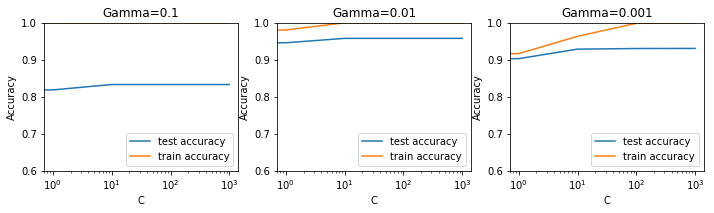

In [51]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(241)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 1/3
plt.subplot(242)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(243)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')



In [52]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9578571428571429 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [53]:
start_time = timeit.default_timer()
rbf_model = SVC(kernel="poly",gamma = 0.01,C = 10)

rbf_model.fit(X_train,y_train)
elapsed = timeit.default_timer()-start_time
print(elapsed)


5.546797952000134


In [54]:
y_pred = rbf_model.predict(X_train)

cm = confusion_matrix(y_train,y_pred)

cm

array([[413,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 468,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 417,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0, 434,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0, 405,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 380,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 414,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0,   0, 436,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0, 405,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0, 417]])

In [55]:
accuracy_score(y_train,y_pred)

0.9973809523809524

In [56]:
y_test_pred = rbf_model.predict(X_test)

cm = confusion_matrix(y_test,y_test_pred)
cm

array([[3594,    4,    9,    3,    4,   43,   27,    2,   25,    8],
       [   0, 4159,    9,    8,    4,    4,    6,    6,   15,    5],
       [  40,   99, 3407,   23,   29,   19,   10,   73,   47,   12],
       [  13,   47,   47, 3565,    4,  117,    3,   36,   66,   18],
       [   4,   39,   17,    0, 3508,    1,   10,   10,   11,   65],
       [  29,   41,    9,   75,    5, 3140,   35,    2,   59,   20],
       [  28,   38,   13,    2,   27,   43, 3555,    0,   16,    1],
       [  14,   78,   36,    7,   25,    7,    1, 3726,    6,   61],
       [  16,   62,   25,   67,   29,   55,   19,   14, 3338,   32],
       [  34,   29,    8,   42,  110,   15,    1,   68,   37, 3425]])

In [57]:
accuracy_score(y_test,y_test_pred)

0.936957671957672

The accuracy of the test set if 0.937 which is a significant drop from 0.997 for the train set. The poly model seems to perform slightly better than the linear model

rbf kernel does a better job than the poly and linear kernels.

# PCA

In [58]:
data = digits_train.copy()

In [59]:
X_pca = data.drop('label',axis =1)
y_pca = data.label
X_pca = X_pca/255

In [60]:
pca = PCA(svd_solver = 'randomized',random_state = 28)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=28,
  svd_solver='randomized', tol=0.0, whiten=False)

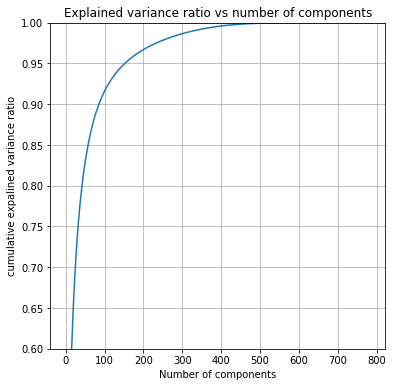

In [61]:
%matplotlib inline
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('cumulative expalined variance ratio')
plt.yticks(np.arange(0,1.1,0.05))
plt.ylim(0.6,1)
plt.grid()
plt.title('Explained variance ratio vs number of components')
plt.show()    

In [62]:
inc_pca = IncrementalPCA(n_components = 400)
data_pc = inc_pca.fit_transform(X_pca)

In [63]:
data_pc = pd.DataFrame(data_pc)

In [64]:
data_pc.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-2.594493,2.742397,-0.718753,-0.472986,-0.317968,-1.919458,-2.680278,0.335527,1.366855,0.795994,...,0.000603,-0.018975,-0.001366,-0.042610,-0.034413,0.021733,-0.001097,-0.081695,0.055066,0.014195
1,6.672360,1.413928,1.967865,-1.315387,-1.734819,-2.895702,2.564217,-0.692552,-0.029491,0.266064,...,-0.026518,0.108354,-0.030890,-0.035999,-0.008290,-0.076117,-0.008065,0.118185,-0.039214,0.027121
2,-3.478017,1.152023,-0.263354,-0.306917,-1.857710,1.268787,1.716859,-1.197560,-0.765865,-0.100494,...,-0.013216,0.003010,-0.015774,-0.005062,-0.000935,-0.001003,-0.004130,-0.026947,-0.000007,0.000003
3,-0.650022,-1.177187,0.251551,-2.979240,-1.669978,-0.617217,-1.192546,1.083957,-0.179872,-1.158736,...,-0.091272,0.088406,0.038721,0.090064,0.009260,0.074387,-0.026475,0.066281,0.228098,-0.031807
4,7.543960,1.761385,2.151424,-0.739432,-2.555829,-3.882603,2.213753,-1.003589,0.489862,0.696340,...,-0.147097,-0.068065,-0.052930,0.073553,-0.078061,0.009926,0.187054,0.151215,-0.003498,-0.097612


In [65]:
X_pca_train,X_pca_test,y_pca_train,y_pca_test = train_test_split(data_pc,y_pca,train_size = 0.1,test_size = 0.9,random_state = 28,stratify = y_pca)

In [66]:
print(y_pca.shape)
print(y_pca_train.shape)
print(y_pca_test.shape)

print('Actual dataset:')
print(round(100*y_pca.value_counts().sort_index()/len(y_pca),2))
print('train dataset:')
print(round(100*y_pca_train.value_counts().sort_index()/len(y_pca_train),2))
print('test dataset:')
print(round(100*y_pca_test.value_counts().sort_index()/len(y_pca_test),2))

(42000,)
(4200,)
(37800,)
Actual dataset:
0     9.84
1    11.15
2     9.95
3    10.36
4     9.70
5     9.04
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64
train dataset:
0     9.83
1    11.14
2     9.95
3    10.36
4     9.69
5     9.05
6     9.86
7    10.48
8     9.67
9     9.98
Name: label, dtype: float64
test dataset:
0     9.84
1    11.15
2     9.94
3    10.36
4     9.70
5     9.03
6     9.85
7    10.48
8     9.67
9     9.97
Name: label, dtype: float64


In [67]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)

hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3],
                     'C': [0.1,1, 10, 100, 1000]}]

pc_rbf_model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = pc_rbf_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_pca_train, y_pca_train)
elapsed = timeit.default_timer()-start_time
print(elapsed)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.6min finished


341.308738897


In [68]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.566294,0.906422,2.265301,0.087956,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.195238,0.200000,0.195238,...,0.192857,0.005976,15,0.202083,0.197321,0.198810,0.203869,0.205060,0.201429,0.002943
1,11.013488,0.157867,1.821137,0.058916,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.897619,0.902381,0.919048,...,0.903333,0.012653,8,0.921131,0.920536,0.914583,0.916964,0.921726,0.918988,0.002756
2,16.930202,0.542952,2.158276,0.045221,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.666667,0.653571,0.698810,...,0.666429,0.017487,14,0.672321,0.680655,0.670833,0.688393,0.678571,0.678155,0.006307
3,18.600006,0.213973,2.002974,0.058572,1,0.1,"{'C': 1, 'gamma': 0.1}",0.811905,0.803571,0.853571,...,0.827143,0.017744,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,4.229407,0.064185,1.187166,0.029360,1,0.01,"{'C': 1, 'gamma': 0.01}",0.948810,0.935714,0.960714,...,0.945952,0.008472,4,0.980952,0.981548,0.976190,0.982143,0.980952,0.980357,0.002130
5,6.947515,0.061145,1.558904,0.055571,1,0.001,"{'C': 1, 'gamma': 0.001}",0.897619,0.904762,0.914286,...,0.902857,0.008165,9,0.915476,0.917857,0.913690,0.916369,0.919345,0.916548,0.001943
6,18.323659,0.325969,1.969573,0.031136,10,0.1,"{'C': 10, 'gamma': 0.1}",0.825000,0.817857,0.866667,...,0.839762,0.017179,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,3.726804,0.041067,1.086431,0.028471,10,0.01,"{'C': 10, 'gamma': 0.01}",0.961905,0.951190,0.975000,...,0.957857,0.009949,3,1.000000,1.000000,1.000000,0.999702,1.000000,0.999940,0.000119
8,3.097340,0.052150,1.043185,0.093722,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929762,0.922619,0.947619,...,0.929286,0.009601,7,0.963988,0.964286,0.957440,0.964881,0.961310,0.962381,0.002757
9,18.297330,0.214911,1.976457,0.053112,100,0.1,"{'C': 100, 'gamma': 0.1}",0.825000,0.817857,0.866667,...,0.839762,0.017179,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


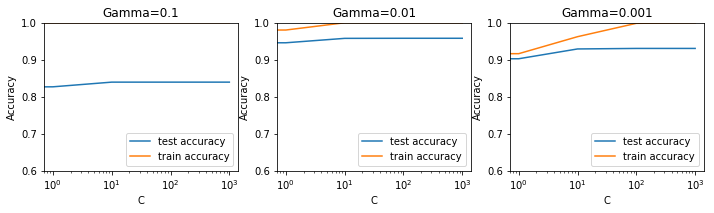

In [69]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(241)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 1/3
plt.subplot(242)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(243)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')



In [70]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9580952380952381 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


Though the optimal parameters show that the optimal C is 100 there is not significant improvement after 10. therefore i am chossing 10 to avaoid any overfitting

In [71]:
pca_model = SVC(kernel="rbf",gamma = 1e-2,C = 10)

In [72]:
pca_model.fit(X_pca_train,y_pca_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_pred = pca_model.predict(X_pca_train)

cm = confusion_matrix(y_pca_train,y_pred)

cm

array([[413,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 468,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 418,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 435,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 407,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 380,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 414,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 440,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 406,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 419]])

In [74]:
accuracy_score(y_pca_train,y_pred)

1.0

In [75]:
y_test_pred = pca_model.predict(X_pca_test)

In [76]:
cm = confusion_matrix(y_pca_test,y_test_pred)
cm

array([[3650,    0,    6,    3,    5,   10,   19,    0,   24,    2],
       [   0, 4165,    9,    3,    2,    3,    6,    8,   14,    6],
       [  23,   27, 3515,   17,   33,   15,   20,   52,   45,   12],
       [   5,   20,   52, 3611,    3,  113,    3,   36,   56,   17],
       [   4,   11,   14,    1, 3510,    3,   15,    9,    5,   93],
       [  22,   12,    9,   70,   11, 3204,   29,    2,   42,   14],
       [  29,    3,   14,    2,   27,   29, 3607,    0,   12,    0],
       [  17,   28,   35,    7,   29,    8,    2, 3762,    5,   68],
       [   6,   39,   28,   65,   28,   40,   18,   16, 3398,   19],
       [  15,   10,    8,   45,   91,   15,    0,   67,   34, 3484]])

In [77]:
accuracy_score(y_pca_test,y_test_pred)

0.9498941798941799

The accuracy of the test set if 0.95 which is a significant drop from 1 for the train set. The rdf model seems to perform better than the linear and poly models

In [78]:
# different class-wise accuracy - #precision, recall and f1-score
label_scores=classification_report(y_pca_test, y_test_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(label_scores)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3719
           1       0.97      0.99      0.98      4216
           2       0.95      0.94      0.94      3759
           3       0.94      0.92      0.93      3916
           4       0.94      0.96      0.95      3665
           5       0.93      0.94      0.93      3415
           6       0.97      0.97      0.97      3723
           7       0.95      0.95      0.95      3961
           8       0.93      0.93      0.93      3657
           9       0.94      0.92      0.93      3769

   micro avg       0.95      0.95      0.95     37800
   macro avg       0.95      0.95      0.95     37800
weighted avg       0.95      0.95      0.95     37800



The results are similar across all the labels

# with 300 components

95% has been explained with 300 features

In [79]:
inc_pca2 = IncrementalPCA(n_components = 300)
data_pc2 = inc_pca2.fit_transform(X_pca)

In [80]:
X_pca_train1,X_pca_test1,y_pca_train1,y_pca_test1 = train_test_split(data_pc2,y_pca,train_size = 0.1,test_size = 0.9,random_state = 28,stratify = y_pca)

In [81]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)

hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3],
                     'C': [0.1,1, 10, 100, 1000]}]

pc_rbf_model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = pc_rbf_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_pca_train1, y_pca_train1)
elapsed = timeit.default_timer()-start_time
print(elapsed)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.5min finished


269.2668887730001


In [82]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.967449,0.258084,1.530454,0.028232,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.195238,0.201190,0.196429,...,0.193333,0.006371,15,0.203274,0.199405,0.199405,0.204167,0.206250,0.202500,0.002706
1,7.809227,0.171924,1.331507,0.033429,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.897619,0.902381,0.920238,...,0.903810,0.012585,8,0.921131,0.920536,0.914286,0.916964,0.922024,0.918988,0.002912
2,13.986015,0.662072,1.712622,0.207024,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.665476,0.653571,0.697619,...,0.665952,0.017047,14,0.672321,0.680655,0.671726,0.688690,0.678274,0.678333,0.006204
3,15.520362,0.378844,1.643033,0.099176,1,0.1,"{'C': 1, 'gamma': 0.1}",0.825000,0.816667,0.863095,...,0.838810,0.016575,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,3.827525,0.085879,1.101340,0.043724,1,0.01,"{'C': 1, 'gamma': 0.01}",0.948810,0.935714,0.960714,...,0.945714,0.008571,4,0.980060,0.981250,0.976190,0.981250,0.979762,0.979702,0.001858
5,5.531355,0.079849,1.268583,0.094170,1,0.001,"{'C': 1, 'gamma': 0.001}",0.897619,0.904762,0.914286,...,0.903333,0.008465,9,0.914583,0.917560,0.913690,0.916667,0.919048,0.916310,0.001951
6,14.848068,0.149322,1.477141,0.028016,10,0.1,"{'C': 10, 'gamma': 0.1}",0.835714,0.833333,0.872619,...,0.849286,0.014238,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,2.970232,0.046520,0.827155,0.018148,10,0.01,"{'C': 10, 'gamma': 0.01}",0.963095,0.951190,0.972619,...,0.957143,0.009874,1,1.000000,1.000000,1.000000,0.999702,1.000000,0.999940,0.000119
8,2.528280,0.067299,0.751014,0.027492,10,0.001,"{'C': 10, 'gamma': 0.001}",0.930952,0.921429,0.947619,...,0.929048,0.009920,7,0.962798,0.963393,0.956548,0.963988,0.960119,0.961369,0.002750
9,14.747633,0.156958,1.475846,0.023743,100,0.1,"{'C': 100, 'gamma': 0.1}",0.835714,0.833333,0.872619,...,0.849286,0.014238,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


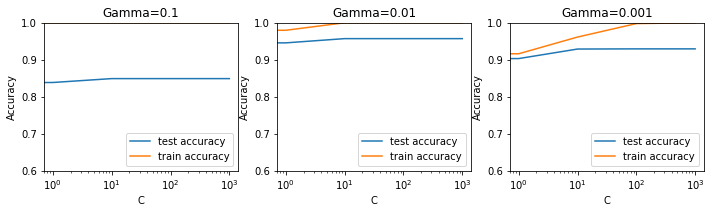

In [83]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(241)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 1/3
plt.subplot(242)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(243)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')



In [84]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9571428571428572 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [85]:
pca_model1 = SVC(kernel="rbf",gamma = 1e-2,C = 10)

pca_model1.fit(X_pca_train1,y_pca_train1)

y_pred = pca_model1.predict(X_pca_train1)
print('training accuracy:')
print(accuracy_score(y_pca_train1,y_pred))

y_test_pred = pca_model1.predict(X_pca_test1)
print('test accuracy:')
print(accuracy_score(y_pca_test1,y_test_pred))

1.0
0.949973544973545


In [86]:
# different class-wise accuracy - #precision, recall and f1-score
label_scores=classification_report(y_pca_test1, y_test_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(label_scores)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3719
           1       0.97      0.99      0.98      4216
           2       0.95      0.93      0.94      3759
           3       0.95      0.92      0.93      3916
           4       0.94      0.96      0.95      3665
           5       0.93      0.94      0.94      3415
           6       0.97      0.97      0.97      3723
           7       0.95      0.95      0.95      3961
           8       0.94      0.93      0.93      3657
           9       0.94      0.92      0.93      3769

   micro avg       0.95      0.95      0.95     37800
   macro avg       0.95      0.95      0.95     37800
weighted avg       0.95      0.95      0.95     37800



There is not significant difference in accuracy with 400 and 300 components.

    - PCA has reduced the number of features from 784 to 300
    - with 400 components i was able to explain almost 100% of the data
    - the run time with PCA has come down by about 40% because of the less number of features 
    - There was not visible hit on the accuracy of the model

In [87]:
xtest = digits_test/255

test_pc = inc_pca2.transform(xtest)

ytest_pred = pca_model1.predict(test_pc)

submission = pd.DataFrame(ytest_pred,index = range(1,28001))

submission = submission.rename(columns={0:'Label'})

submission.index.name = 'ImageId'

submission.to_csv('submission.csv')

# With 20% of the data

In [88]:
X_pca_train2,X_pca_test2,y_pca_train2,y_pca_test2 = train_test_split(data_pc2,y_pca,train_size = 0.2,test_size = 0.8,random_state = 28,stratify = y_pca)

In [89]:
start_time = timeit.default_timer()
folds = KFold(n_splits = 5, shuffle = True, random_state = 28)

hyper_params = [ {'gamma': [1e-2, 1e-3,1e-4],
                     'C': [0.1,1, 10, 100]}]

pc_rbf_model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = pc_rbf_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = -1)      
model_cv.fit(X_pca_train2, y_pca_train2)
elapsed = timeit.default_timer()-start_time
print(elapsed)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.0min finished


605.914335487


In [90]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.064939,0.190153,4.583605,0.047016,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.922024,0.926190,0.925000,...,0.920714,0.004900,7,0.929613,0.928869,0.930357,0.930804,0.930208,0.929970,0.000669
1,45.701488,0.735861,6.104104,0.140865,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.827381,0.841071,0.809524,...,0.821071,0.012664,11,0.828571,0.827976,0.825000,0.831250,0.820833,0.826726,0.003554
2,59.739085,1.692922,6.346462,0.186964,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.111905,0.116071,0.118452,...,0.111548,0.007306,12,0.111458,0.110417,0.109970,0.111012,0.115030,0.111577,0.001799
3,9.653438,0.240315,2.752483,0.070833,1,0.01,"{'C': 1, 'gamma': 0.01}",0.957143,0.957738,0.955357,...,0.955119,0.002514,3,0.978869,0.980060,0.981250,0.978274,0.981548,0.980000,0.001282
4,15.995026,0.128239,4.003406,0.065780,1,0.001,"{'C': 1, 'gamma': 0.001}",0.915476,0.919048,0.911310,...,0.912024,0.004693,8,0.918899,0.917857,0.920982,0.922173,0.923661,0.920714,0.002114
5,41.647282,0.674354,6.035049,0.082217,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.831548,0.844048,0.813690,...,0.826071,0.010933,10,0.832440,0.830655,0.829018,0.836458,0.826786,0.831071,0.003276
6,8.411633,0.092638,2.502481,0.074093,10,0.01,"{'C': 10, 'gamma': 0.01}",0.970238,0.964286,0.966071,...,0.965238,0.002782,1,0.999851,0.999702,0.999554,0.999554,0.999554,0.999643,0.000119
7,7.412729,0.149408,2.340491,0.039072,10,0.001,"{'C': 10, 'gamma': 0.001}",0.943452,0.944048,0.935119,...,0.938452,0.004974,5,0.959375,0.958482,0.959375,0.957738,0.959673,0.958929,0.000717
8,15.593336,0.352143,3.932196,0.104135,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.914881,0.916071,0.908929,...,0.909881,0.004960,9,0.916815,0.916964,0.918155,0.920238,0.920685,0.918571,0.001618
9,8.166931,0.094815,2.489727,0.065768,100,0.01,"{'C': 100, 'gamma': 0.01}",0.970238,0.963690,0.964881,...,0.965000,0.002699,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


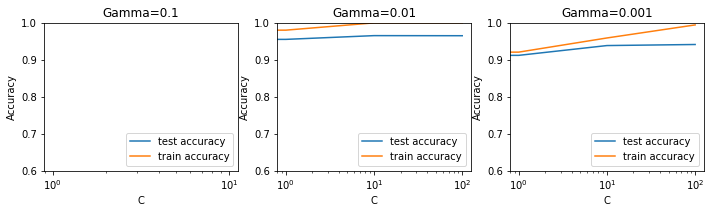

In [91]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(241)
gamma_01 = cv_results[cv_results['param_gamma']==0.1]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.1")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')


# subplot 1/3
plt.subplot(242)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

# subplot 2/3
plt.subplot(243)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')



In [92]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9652380952380952 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [93]:
pca_model2 = SVC(kernel="rbf",gamma = 1e-2,C = 10)

pca_model2.fit(X_pca_train2,y_pca_train2)

y_pred = pca_model2.predict(X_pca_train2)
print('training accuracy:')
print(accuracy_score(y_pca_train2,y_pred))

y_test_pred = pca_model2.predict(X_pca_test2)
print('testing accuracy:')
print(accuracy_score(y_pca_test2,y_test_pred))

0.9995238095238095
0.9614583333333333


In [94]:
# different class-wise accuracy - #precision, recall and f1-score
label_scores=classification_report(y_pca_test2, y_test_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(label_scores)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3306
           1       0.97      0.99      0.98      3747
           2       0.97      0.95      0.96      3342
           3       0.96      0.94      0.95      3481
           4       0.95      0.97      0.96      3257
           5       0.95      0.95      0.95      3036
           6       0.98      0.98      0.98      3310
           7       0.97      0.96      0.96      3521
           8       0.95      0.95      0.95      3250
           9       0.95      0.94      0.95      3350

   micro avg       0.96      0.96      0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600



In [95]:
xtest = digits_test/255

test_pc = inc_pca2.transform(xtest)

ytest_pred = pca_model2.predict(test_pc)

submission = pd.DataFrame(ytest_pred,index = range(1,28001))

submission = submission.rename(columns={0:'Label'})

submission.index.name = 'ImageId'

submission.to_csv('submission.csv')

    - The accuracy of the model with 20% training data has a small bump accuracy when compared to the 10% training data. But the runtime is double that of the 10% of the training data.
Final Model:
    - PCA with 300 components
    - 20% of training data is used
    - training accuracy is 0.9997
    - test acuracy is 0.96
    - the score in the kaggle competition with this model is 0.9611